In [2]:
import tensorflow as tf
import os
from IPython.display import Image, display #not included!
import imghdr
import cv2
from matplotlib import pyplot as plt
import numpy

C:\Users\JamesCho\AppData\Local\Temp\ipykernel_19708\14967556.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [32]:
testing = 'data'
valid_exts = ['jpg', 'jpeg', 'png']
cnt = 0

In [33]:
# for image_class in os.listdir(testing):
#     classdir = os.path.join(testing, image_class)
#     for image in os.listdir(classdir):
#         if cnt == 1:
#             break
#         imagedir = os.path.join(classdir, image)
#         display(Image(filename=imagedir))
#         cnt += 1

#go from datafolder --> individual class --> image
#don't run this -- outputs image.

In [34]:
for image_class in os.listdir(testing):
    classdir = os.path.join(testing, image_class)
    for image in os.listdir(classdir):
        imagedir = os.path.join(classdir, image)
        image = cv2.imread(imagedir)
        extension = imghdr.what(imagedir)
        if extension not in valid_exts:
            print("Image {} is not valid!", format(imagedir))
        elif image is None:
            print("Image {} is not valid!", format(imagedir))

            #works!

In [56]:
data = tf.keras.utils.image_dataset_from_directory('data')
data = data.map(lambda x,y: (x/255, y)) #categotizes into class
data_iterator = data.as_numpy_iterator() #easier --> numpy for batches!

Found 257 files belonging to 2 classes.


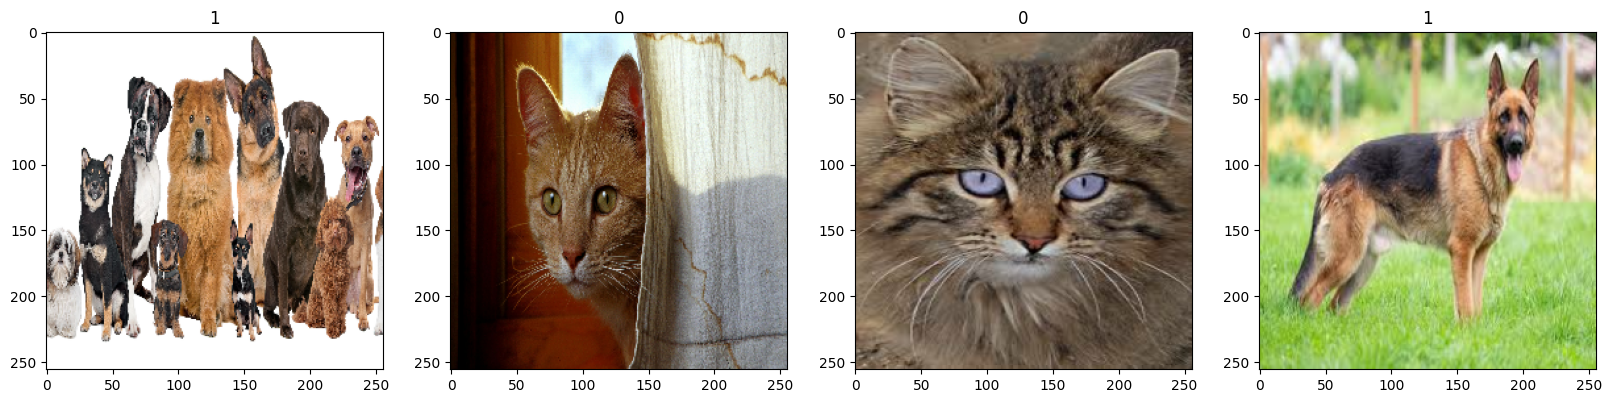

In [57]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    #PRINT IMAGE
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

In [58]:
len(data)

9

In [66]:
train_size = int(len(data) * .5)
val_size = int(len(data) * .25) + 1
test_size = int(len(data) * .25)

In [60]:
train_size

4

In [67]:
val_size

3

In [62]:
test_size

2